In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **1. Exploring Spotify's 2017 Data**
The data imported below is information on the top 100 most played songs in 2017 from Spotify's analytic data. I'm trying to write the next #1 hit, so I am going to investigate the data and see how I should write my song to have the best chance of topping the charts.

In [0]:
hits = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSu6oqmAxVJ56uviTdPLAKAKAenvMh97_wcQ4XhmXHsdZaWd1jIyTpa6aR-7k7H4FhPMr4TjKn1PSrz/pub?gid=986173170&single=true&output=csv')

In [3]:
hits.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713,4
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2,-4.328,1,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827,4
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2,-4.757,1,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200,4
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11,-6.769,0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160,4
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7,-4.284,1,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600,4


We can see there is a lot of numerical data. The explainations for the columns can be found from the source dataset's kaggle: https://www.kaggle.com/nadintamer/top-tracks-of-2017

In [4]:
print(hits.info())
print(hits.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null int64
loudness            100 non-null float64
mode                100 non-null int64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null int64
time_signature      100 non-null int64
dtypes: float64(9), int64(4), object(3)
memory usage: 12.6+ KB
None
       danceability      energy         key    loudness        mode  \
count     100.00000  100.000000  100.000000  100.000000  100.000000   
mean        0.69682    0.660690    5.5700

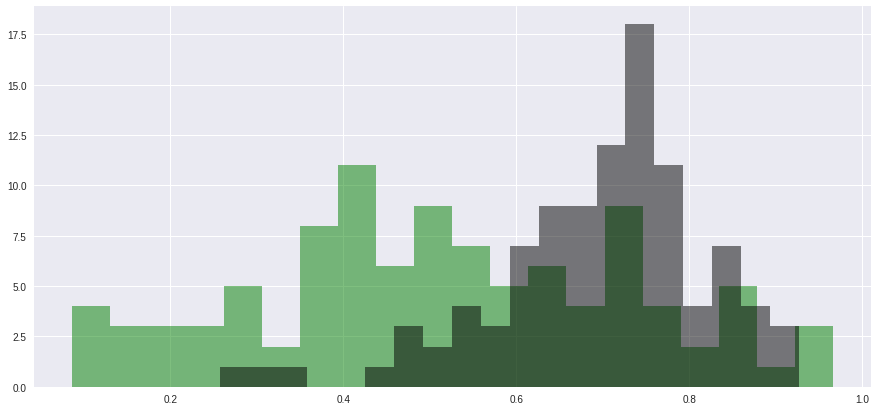

In [5]:
plt.figure(figsize=(15, 7))
plt.hist(hits['valence'], bins=20, color='g', alpha=0.5)
plt.hist(hits['danceability'], bins=20, color='black', alpha=0.5)
plt.show()

This histogram is comparing valence, where a happy/upbeat song is 1.0 and a sad/angry song is 0, with danceability, where a very danceable song is 1.0 and a song not good for dancing is 0. I thought there would be more correlation between the two but am surprised to observe that there is more of an even mix between happy and sad songs in the top 100 songs of 2017. What is more interesting is that this means some songs that are not so upbeat are still scoring well for danceability.

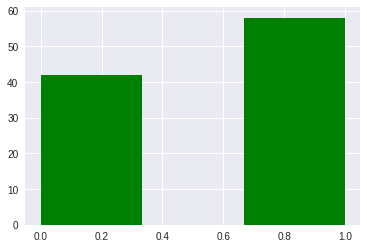

In [6]:
plt.hist(hits['mode'], bins=3, color='g')
plt.show()

This plots number of songs in a minor key, 0, and songs in a major key, 1. We can see there are more songs in a major key, but not by a wide margin.

# **2. Okay, I want to write a hit song, but where do I start?**
Let's start with the energy and tone of the song. We'll start with energy, measured at 0 for low-energy and 1 for high-energy based on volume and tempo. We will then break that down into loudness and tempo to see if there are general preferences for the energy of a song. Loudness is averaged for an entire song and displayed in decibels (dB). Tempo is displayed in BPM where higher is faster.

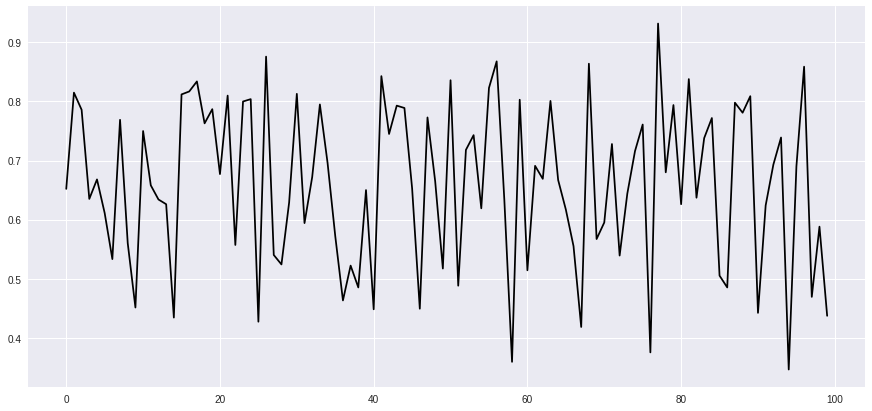

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(hits['energy'], color='black')
plt.show()

This plot shows the energy levels of each of the songs in order of most to least played. The mix looks fairly eclectic. Normally I might do some sorting to figure out what the distribution is, but for now I will leave it as is to preserve the song's ranking. We see the distribution more clearly in the histogram below.

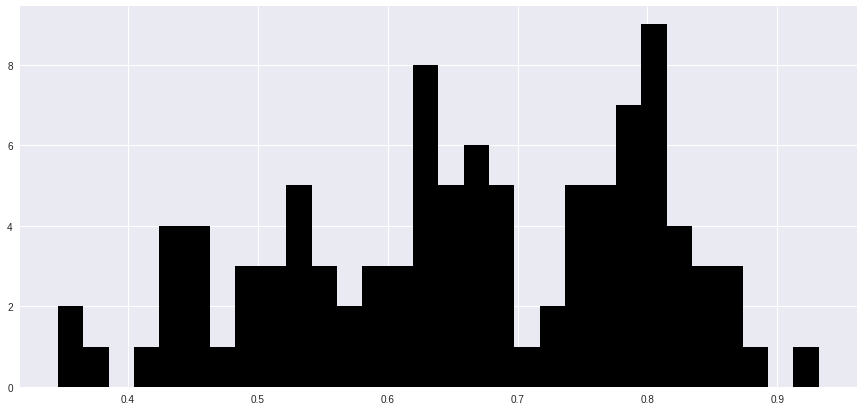

In [24]:
plt.figure(figsize=(15,7))
plt.hist(hits['energy'], bins=30, color='black')
plt.show()

We can see there is some curve in the data, although it's not as definitive as we'd like. Let's break it down into the volume and tempo components.

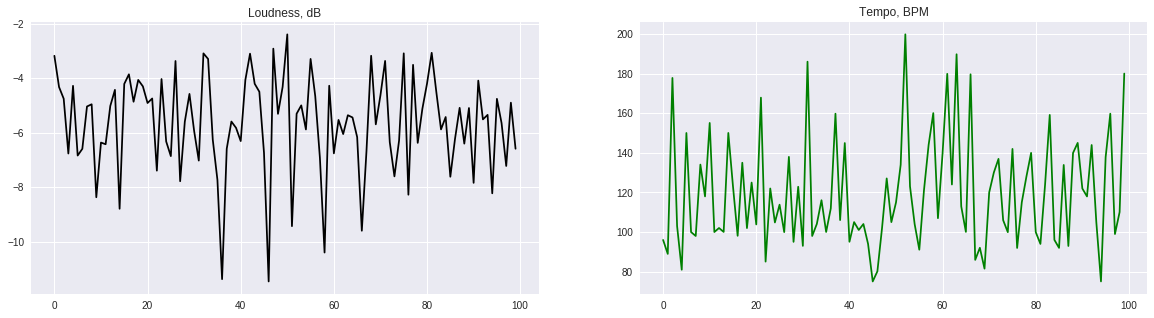

In [8]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title('Loudness, dB')
plt.plot(hits['loudness'], color='black')
plt.subplot(122)
plt.title('Tempo, BPM')
plt.plot(hits['tempo'], color='g')
plt.show()

These charts are also fairly eclectic, which makes sense since a song's energy was based on both volume and tempo of a song. 

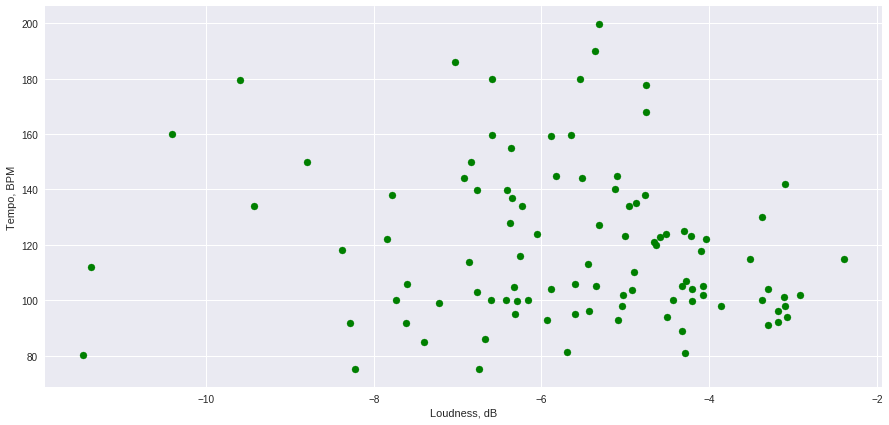

In [9]:
plt.figure(figsize=(15, 7))
plt.scatter(x=hits['loudness'], y=hits['tempo'], color='g')
plt.xlabel('Loudness, dB')
plt.ylabel('Tempo, BPM')
plt.show()

From this plot, there's a clear tempo preference between 90-130 BPM. The loudness preference seems to be between -8 dB and -4 dB. 

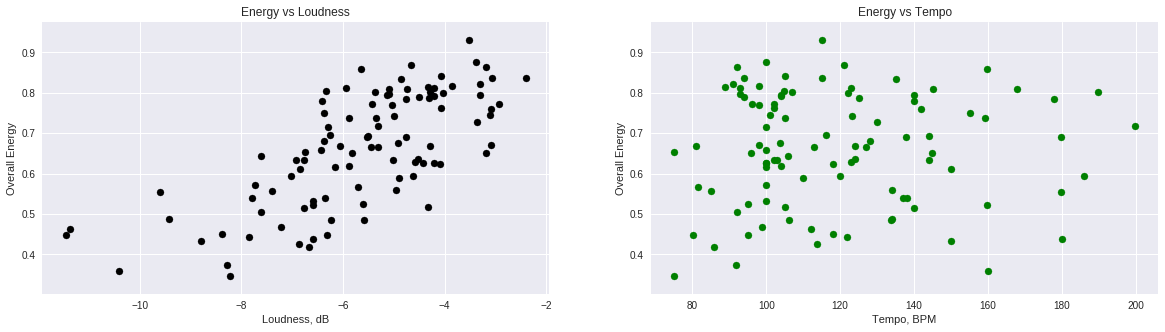

In [10]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title('Energy vs Loudness')
plt.scatter(x=hits['loudness'], y=hits['energy'], color='black')
plt.xlabel('Loudness, dB')
plt.ylabel('Overall Energy')
plt.subplot(122)
plt.title('Energy vs Tempo')
plt.scatter(x=hits['tempo'], y=hits['energy'], color='g')
plt.xlabel('Tempo, BPM')
plt.ylabel('Overall Energy')
plt.show()

From these two plots, we can see higher loudness tends to be preferred, while the preferred tempo looks to be lower. I recommend writing a song with a volume between -8 and -4 decibels. The tempo is less definitive, but anywhere between 90 and 130 as shown in previous graphs is a good range to hold to. 

# **3. Seems easy enough. How should I play it?**
Let's look at speechiness and instrumentalness. Speechiness is calculated based on the amount of spoken word in a track, where 0 is no spoken word and 1 is only speech, like a podcast. Values between 0.33 and 0.66 illustrate the presence of rap. This will tell us if the song should be heavy on vocals, rap, or a mix of both. Instrumentalness will tell us how much of the song should focus on the instrumental talents of your band. Values close to 0 have a heavy vocal focus where values at 1 contain no vocals at all.

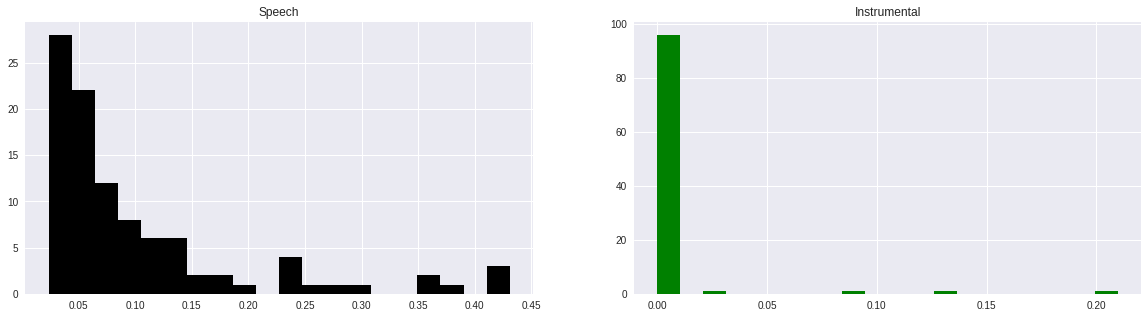

In [11]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(hits['speechiness'], bins=20, color='black')
plt.title('Speech')
plt.subplot(122)
plt.hist(hits['instrumentalness'], bins=20, color='g')
plt.title('Instrumental')
plt.show()

This one is much easier to pick out a pattern. People love hearing lyrics, it looks like there were only four songs that were slightly more instrumental. They also love to hear singing and melody. It would probably would not hurt your chances of getting a hit if there is some rapping in your song, but you'll definitely want to have a good melodic hook.

# **4. Alright I can sing. What's going to make my song stand out?**
A standout song will take into account danceability, duration, and acousticness. For danceability, a song that's easy to dance to is 1 and one that is not will be 0. Acousticness has a similar scale where 0 is a not acoustic song and 1 is most likely acoustic. Duration will be displayed in milliseconds.

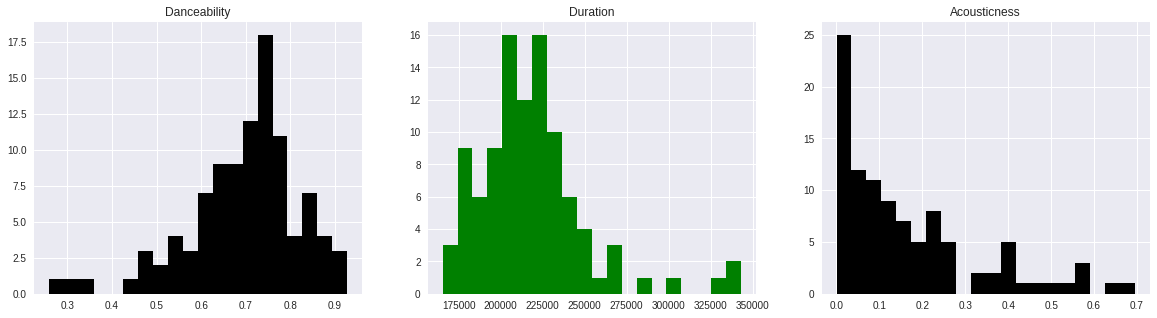

In [21]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.hist(hits['danceability'], bins=20, color='black')
plt.title('Danceability')
plt.subplot(132)
plt.hist(hits['duration_ms'], bins=20, color='green')
plt.title('Duration')
plt.subplot(133)
plt.hist(hits['acousticness'], bins=20, color='black')
plt.title('Acousticness')
plt.show()

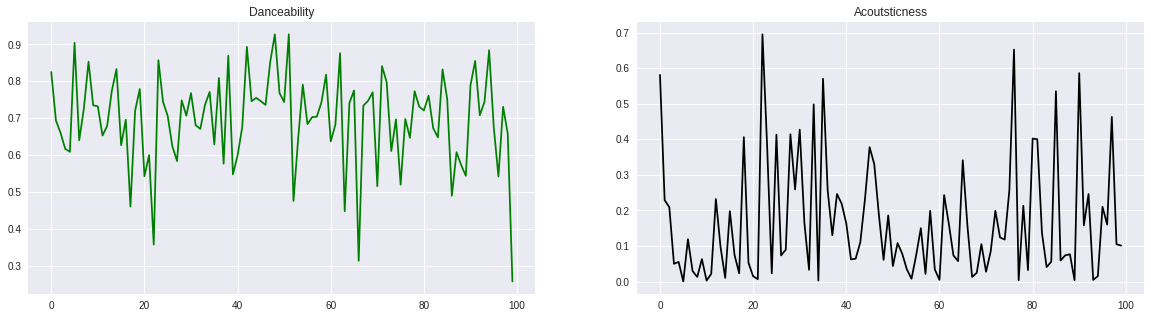

In [20]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(hits['danceability'], color='green')
plt.title('Danceability')
plt.subplot(122)
plt.plot(hits['acousticness'], color='black')
plt.title('Acoutsticness')
plt.show()

By directly comparing plots of danceability and acousticness, we can see there is a general preference for more danceable songs and lower acousticness. 

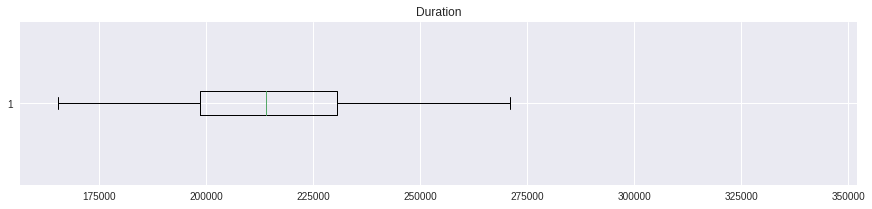

In [13]:
plt.figure(figsize=(15, 3))
plt.boxplot(hits['duration_ms'], vert=False)
plt.title('Duration')
plt.show()

This boxplot shows that the sweet spot for song duration is somewhere between 200,000 and 230,000 milliseconds. That's between 3 minutes and 20 seconds and 3 minutes and 50 seconds.

# **5. What's Next? **
We used this data to figure out how to write a hit song ourselves, but it would be interesting to apply it in the reverse. I'd like to take this data and create a 'hit-song predictor.' Ideally, this would require more data, perhaps from the past 5-10 years of hit songs. We'd take a new song's corresponding data and see if it has potential to be a hit song. The main question: Could this be a hit song? would be answered by asking similar questions about the data, such as: What are the speechiness and instrumentalness like? How loud is the song and what is the tempo like? How danceable is the song? Are there acoustic instruments? I would want the final prediction to be the percentage chance a song will be a hit song. 


---

There are some gaps in the data that may prevent us from having a definitive answer. I would want data spanning the past 5-10+ years, and some new data points. I could calculate a 'fanbase' number based on how often an artist shows up on the charts. Ideally, there would be genre tracking and how many/which instruments are featured in a song. 